In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [ ]:
df = pd.read_csv("cleaned_tweets.csv")
df.dropna(inplace=True)

In [ ]:
df

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam yesterday kcon makeup featherette,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,galaxy far far away,2
...,...,...
49995,ootd love chain new ring putaringonit odesigne...,1
49996,met santa olaf north pole today north pole...,0
49997,new york night strideby herelocationnyc seemyc...,11
49998,kiss birthday girl helzberg diamond,0


In [ ]:
X = df["Tweet"].values
y = df["Label"].values

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(random_state=42)
X = X.reshape(-1,1)
X, y = os.fit_resample(X, y)

In [ ]:
X = X.reshape(-1,)
X.shape


(215140,)

In [ ]:
X

array(['little throwback favourite person   water wall',
       'glam   yesterday kcon makeup   featherette',
       'democracy plaza wake stunning outcome decision   nbc news', ...,
       'cute americasnexttopmodel luckstrikesnyc bepatientandwaitonit justdonatetosay   lucky',
       'story life boymom momlife mysnuggieissoiled',
       'work today love snow theweatherman americanninjawarrior   city norwalk'],
      dtype=object)

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(X)

In [ ]:
print("Text \n",X[:10],'\n')

X_seqs = tokenizer.texts_to_sequences(X)
print("Sequences")
X_seqs[:10]

Text 
 ['little throwback favourite person   water wall'
 'glam   yesterday kcon makeup   featherette'
 'democracy plaza wake stunning outcome decision   nbc news'
 'amp vilo   walt disney magic kingdom' '  galaxy far far away'
 'dinner fla tonight   panseared salmon couscous veggie salad yum dinner florida salmon'
 'fav senior game congrats beating west   west salem'
 'got formal best friend   phi mu jsu'
 'cause miss little homies throwback cousinlove   indiana university'
 'birthday kiss   madison wisconsin'] 

Sequences


[[25, 328, 1673, 312, 509, 674],
 [2794, 191, 23386, 525, 23387],
 [6998, 539, 936, 1154, 8457, 2258, 5308, 1394],
 [6, 43157, 399, 57, 130, 240],
 [2405, 606, 606, 422],
 [141, 14841, 36, 43158, 2425, 43159, 3955, 1494, 1618, 141, 43, 2425],
 [373, 334, 97, 413, 4782, 137, 137, 2406],
 [18, 947, 19, 22, 876, 2606, 26955],
 [388, 86, 25, 1513, 328, 7281, 442, 16],
 [28, 564, 527, 696]]

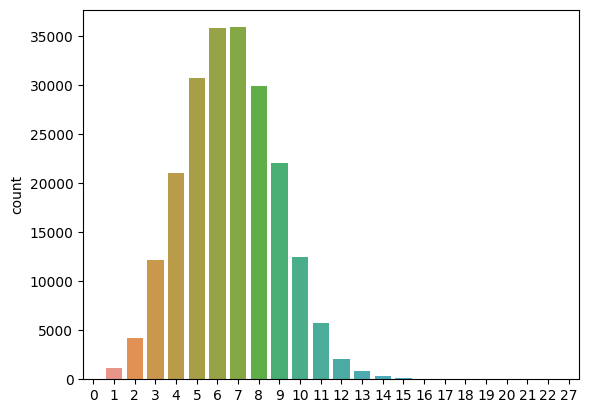

In [ ]:
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens)
plt.show()

In [ ]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(1,10):
    print("Index: ",i, "->",idx2words[i])

Word Mappings

Index:  1 -> love
Index:  2 -> new
Index:  3 -> day
Index:  4 -> nt
Index:  5 -> happy
Index:  6 -> amp
Index:  7 -> beach
Index:  8 -> christmas
Index:  9 -> time


In [ ]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 54747


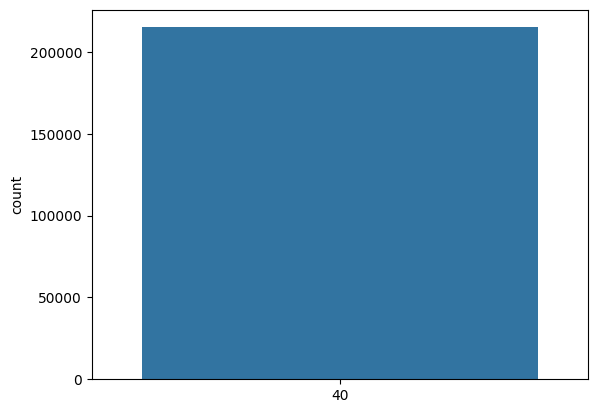

In [ ]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens)
plt.show()

In [ ]:

from keras.preprocessing.sequence import pad_sequences

max_len=40
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [ ]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[25, 328, 1673, 312, 509, 674]]

After Padding
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   25  328 1673  312  509  674]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X_seqs_pd, y, test_size=0.3, random_state=105)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

Training X Dim  (150598, 40)
Training y Dim  (150598,)
Test X Dim  (64542, 40)
Test y Dim  (64542,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Embedding

vocabulary_size = vocab_size
seq_len = 40
#embedded vectors [vector size for each word]
embed_len=20

model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(LSTM(units = 80, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units = 40))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 20)            1094960   
                                                                 
 lstm_2 (LSTM)               (None, 40, 80)            32320     
                                                                 
 dropout_2 (Dropout)         (None, 40, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 40)                19360     
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
Total params: 1147460 (4.38 MB)
Trainable params: 1147

In [ ]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [ ]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:

model.fit(X_train, y_train_cat, batch_size=128, epochs = 20, shuffle=True,
          validation_data=(X_test, y_test_cat))

Epoch 1/20
1177/1177 [==============================] - 209s 173ms/step - loss: 2.4004 - accuracy: 0.2690 - val_loss: 1.7216 - val_accuracy: 0.5007
Epoch 2/20
1177/1177 [==============================] - 207s 176ms/step - loss: 1.4454 - accuracy: 0.5891 - val_loss: 1.1799 - val_accuracy: 0.6750
Epoch 3/20
1177/1177 [==============================] - 203s 173ms/step - loss: 1.0304 - accuracy: 0.7173 - val_loss: 0.9586 - val_accuracy: 0.7382
Epoch 4/20
1177/1177 [==============================] - 203s 172ms/step - loss: 0.8162 - accuracy: 0.7776 - val_loss: 0.8404 - val_accuracy: 0.7756
Epoch 5/20
1177/1177 [==============================] - 205s 174ms/step - loss: 0.6843 - accuracy: 0.8140 - val_loss: 0.7775 - val_accuracy: 0.7924
Epoch 6/20
1177/1177 [==============================] - 203s 173ms/step - loss: 0.5914 - accuracy: 0.8404 - val_loss: 0.7388 - val_accuracy: 0.8132
Epoch 7/20
1177/1177 [==============================] - 204s 173ms/step - loss: 0.5286 - accuracy: 0.8569 - val_

In [ ]:
model.save("emojiPred_lstmModel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
batch_size=128
model.evaluate(X_test, y_test_cat, batch_size=batch_size)

505/505 [==============================] - 28s 54ms/step - loss: 0.6534 - accuracy: 0.8779


[0.6534207463264465, 0.8779244422912598]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predicted_probabilities = model.predict(X_test)

predicted_classes = np.argmax(predicted_probabilities, axis=1)

true_classes = np.argmax(y_test_cat, axis=1)

print(classification_report(true_classes, predicted_classes))

2017/2017 [==============================] - 33s 16ms/step
              precision    recall  f1-score   support

           0       0.43      0.25      0.31      3210
           1       0.73      0.63      0.68      3238
           2       0.81      0.73      0.77      3269
           3       0.81      0.82      0.82      3240
           4       0.90      0.92      0.91      3197
           5       0.87      0.85      0.86      3247
           6       0.87      0.93      0.90      3251
           7       0.86      0.92      0.89      3108
           8       0.89      0.90      0.90      3226
           9       0.87      0.92      0.89      3185
          10       0.95      0.97      0.96      3221
          11       0.91      0.97      0.94      3262
          12       0.93      0.98      0.95      3244
          13       0.91      0.95      0.93      3188
          14       0.91      0.96      0.94      3335
          15       0.94      0.96      0.95      3249
          16       0.9

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_classes, predicted_classes)


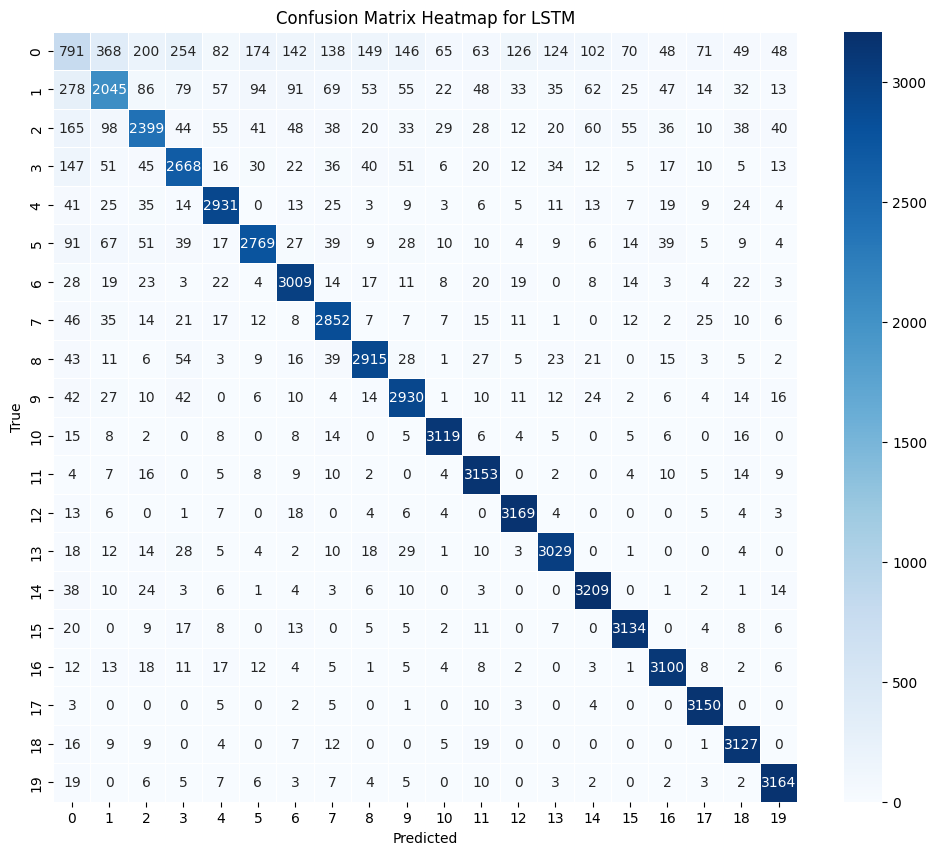

In [ ]:

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap for LSTM')
plt.show()

In [ ]:
from tensorflow import keras

model = keras.models.load_model("emojiPred_lstmModel.h5", compile=False)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 20)            1094960   
                                                                 
 lstm_2 (LSTM)               (None, 40, 80)            32320     
                                                                 
 dropout_2 (Dropout)         (None, 40, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 40)                19360     
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
Total params: 1147460 (4.38 MB)
Trainable params: 1147

In [ ]:
emoji_raw = open('us_mapping.txt','r',encoding="utf8")

emojis=[]
for sentence in emoji_raw:
    sentence = sentence.rstrip()
    emojis.append(sentence)


emoji_dict={}

for e in emojis:
    idx = int(e.split()[0])
    emoji = e.split()[1]
    emoji_dict[idx] = emoji

In [ ]:
import string
import re

from tensorflow import keras
emoji_predict_model = keras.models.load_model("emojiPred_lstmModel.h5", compile=False)


def tweet_clean(tweet):
    tweet = str(tweet).lower()
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet)
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention)
    rm_links = re.sub(r'http\S+', '', rm_rt)
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    rm_nums = re.sub('[0-9]+', '', rm_links)
    rm_punc = [char for char in rm_nums if char not in string.punctuation]
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc

    return cleaned


# def predict_emoji(text, model=emoji_predict_model):
#     text = tweet_clean(text)
#     X_sequences = text
#     predictions = np.argmax(model.predict(X_sequences), axis=1)
#     emoji_idx = predictions[0]
#     emoji = emoji_dict[emoji_idx]

#     return emoji

def predict_emoji(text, model=emoji_predict_model):
    text = tweet_clean(text)

    # Tokenize and pad the text
    max_len = 40
    tokenizer = Tokenizer(num_words=20)
    tokenizer.fit_on_texts([text])
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, truncating="pre", padding="pre", maxlen=max_len)

    # Make predictions
    predictions = np.argmax(model.predict(text_padded), axis=1)
    emoji_idx = predictions[0]
    emoji = emoji_dict.get(emoji_idx, "Unknown")

    return emoji


In [ ]:
text = input("Enter tweet \n")

print("\nEmojified Tweet \n")
print(text+" "+predict_emoji(text))

Enter tweet 
Let's explore the North East University

Emojified Tweet 

1/1 [==============================] - 0s 33ms/step
Let's explore the North East University 📸


In [ ]:
text = input("Enter tweet \n")

print("\nEmojified Tweet \n")
print(text+" "+predict_emoji(text))

Enter tweet 
Asif sir is our supervisor for this project

Emojified Tweet 

1/1 [==============================] - 0s 28ms/step
Asif sir is our supervisor for this project ❤️


In [ ]:
text = input("Enter tweet \n")

print("\nEmojified Tweet \n")
print(text+" "+predict_emoji(text))

Enter tweet 
we want more holidays

Emojified Tweet 

1/1 [==============================] - 0s 45ms/step
we want more holidays 😘
